In [1]:
import pandas as pd 
from bs4 import BeautifulSoup
import requests
import numpy as np
import scipy.stats as stats
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns
import re

# Importing data

In [2]:

# I can vary the year from 2015 onwards

# For example: 
## year = 2024
## start_url = "https://www.exchange-rates.org/exchange-rate-history/idr-gbp-{year}"
## THis way, I can automate the process
## I will create a class that can summarise my pipeline and then use this function for each year 

start_url = "https://www.exchange-rates.org/exchange-rate-history/idr-gbp"

url2 = "https://www.exchange-rates.org/exchange-rate-history/idr-gbp"


data = requests.get(start_url) 

soup = BeautifulSoup(data.text)



In [3]:
years = soup.select('ul.rates-by-year li')
year = [] 
for i in years: 
    print (i.text)
    year.append(int(i.text))
max_year = max(year) 
min_year = min(year)


2024


2023


2022


2021


2020


2019


2018


2017


2016


2015



In [4]:
start_url = "https://www.exchange-rates.org/exchange-rate-history/idr-gbp"


# Turn into numbers 
html = requests.get(start_url)
soup = BeautifulSoup(html.text)
# I need to assign this to different years 
years = soup.select('ul.rates-by-year li')
year = [] 
for i in years: 
    year.append(int(i.text))
max_year = max(year) 
min_year = min(year)

print (f"{min_year} :: {max_year}")

2015 :: 2024


## Data Collection for each Year

I can sort through each year and find the maximum value 

In [5]:
# I need to find out the current year and match it to the records (or I could just use the current year)

In [6]:
import requests

# Test 

## I will need to put this in a function

In [7]:



start_url = f"https://www.exchange-rates.org/exchange-rate-history/idr-gbp-2024"

# Turn into numbers 
html = requests.get(start_url)
soup = BeautifulSoup(html.text)
# I need to assign this to different years 


values_html = soup.select("table.history-rates-data tbody tr td")
row_values_html = soup.select('table.history-rates-data tbody tr td')
column_1 = soup.select("table thead tr th.ltr-bidi-fix")

#############################################
columns = [i.text for i in column_1]
values = [i.text for i in values_html]


## I will need to parse through this...
row_values = [i.get_text(separator=" ", strip=True) for i in row_values_html]


## collecting the table for historical data
## Making the dataframe 

## I need to use the .get_text(seperator=" ", strip=True)

df = pd.DataFrame(row_values)

## Odd numbers shows the exchange rate 
## Even numbers show the date 


exchange = [] 
date = [] 

for i in df.index: 
    
    if i % 2 == 0: 

        date.append(df.iloc[i].values[0])
        
    else: 

        exchange.append(df.iloc[i].values[0])
        
new_df = pd.DataFrame({
    "date": date, 
    "exchange_rate": exchange
})

## Dropping the last row 

new_df.drop(new_df.tail(1).index, inplace=True)

## Removing the square brackets 


In [8]:
years = soup.select('ul.rates-by-year li')
year = [] 
for i in years: 
    print (i.text)
    year.append(int(i.text))
    
    


2024


2023


2022


2021


2020


2019


2018


2017


2016


2015



In [9]:
year

[2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015]

In [10]:
new_df

,date,exchange_rate
0,"January 1, 2024 2024-1-1",1 IDR = 0.00005104 GBP 1 IDR = 0.00005104 GBP
1,"January 2, 2024 2024-1-2",1 IDR = 0.00005111 GBP 1 IDR = 0.00005111 GBP
2,"January 3, 2024 2024-1-3",1 IDR = 0.00005072 GBP 1 IDR = 0.00005072 GBP
3,"January 4, 2024 2024-1-4",1 IDR = 0.00005081 GBP 1 IDR = 0.00005081 GBP
4,"January 5, 2024 2024-1-5",1 IDR = 0.00005069 GBP 1 IDR = 0.00005069 GBP
...,...,...
152,"July 23, 2024 2024-7-23",1 IDR = 0.00004777 GBP 1 IDR = 0.00004777 GBP
153,"July 24, 2024 2024-7-24",1 IDR = 0.00004770 GBP 1 IDR = 0.00004770 GBP
154,"July 25, 2024 2024-7-25",1 IDR = 0.00004763 GBP 1 IDR = 0.00004763 GBP
155,"July 26, 2024 2024-7-26",1 IDR = 0.00004766 GBP 1 IDR = 0.00004766 GBP


In [11]:



start_url = f"https://www.exchange-rates.org/exchange-rate-history/idr-gbp-2015"

# Turn into numbers 
html = requests.get(start_url)
soup = BeautifulSoup(html.text)
# I need to assign this to different years 


values_html = soup.select("table.history-rates-data tbody tr td")
row_values_html = soup.select('table.history-rates-data tbody tr td')
column_1 = soup.select("table thead tr th.ltr-bidi-fix")

#############################################
columns = [i.text for i in column_1]
values = [i.text for i in values_html]


## I will need to parse through this...
row_values = [i.get_text(separator=" ", strip=True) for i in row_values_html]


## collecting the table for historical data
## Making the dataframe 

## I need to use the .get_text(seperator=" ", strip=True)

df = pd.DataFrame(row_values)

## Odd numbers shows the exchange rate 
## Even numbers show the date 


exchange = [] 
date = [] 

for i in df.index: 
    
    if i % 2 == 0: 

        date.append(df.iloc[i].values[0])
        
    else: 

        exchange.append(df.iloc[i].values[0])
        
new_df = pd.DataFrame({
    "date": date, 
    "exchange_rate": exchange
})

## Dropping the last row 

new_df.drop(new_df.tail(1).index, inplace=True)

## Preproecssing the data




In [12]:
# Function to clean exchange_rate column
def clean_exchange_rate(rate):
    # Split the rate by space and remove duplicates
    parts = rate.split()
    seen = set()
    unique_parts = []
    for part in parts:
        if part not in seen:
            unique_parts.append(part)
            seen.add(part)
    # Join the unique parts back into a single string
    return ' '.join(unique_parts)

# Apply the cleaning function to the exchange_rate column
new_df['exchange_rate'] = new_df['exchange_rate'].apply(clean_exchange_rate)

# Further split and clean the date column if necessary
def clean_date(date):
    parts = date.split()
    # Assuming the first three parts represent the full date in text form
    clean_date = ' '.join(parts[:3])
    return clean_date

new_df['date'] = new_df['date'].apply(clean_date)

# Display the cleaned dataframe
print(new_df)

                  date           exchange_rate
0      January 1, 2015  1 IDR = 0.00005159 GBP
1      January 2, 2015  1 IDR = 0.00005206 GBP
2      January 3, 2015  1 IDR = 0.00005213 GBP
3      January 5, 2015  1 IDR = 0.00005200 GBP
4      January 6, 2015  1 IDR = 0.00005217 GBP
..                 ...                     ...
328  December 27, 2015  1 IDR = 0.00004918 GBP
329  December 28, 2015  1 IDR = 0.00004915 GBP
330  December 29, 2015  1 IDR = 0.00004890 GBP
331  December 30, 2015  1 IDR = 0.00004901 GBP
332  December 31, 2015  1 IDR = 0.00004906 GBP

[333 rows x 2 columns]


In [13]:
new_df.head()

,date,exchange_rate
0,"January 1, 2015",1 IDR = 0.00005159 GBP
1,"January 2, 2015",1 IDR = 0.00005206 GBP
2,"January 3, 2015",1 IDR = 0.00005213 GBP
3,"January 5, 2015",1 IDR = 0.00005200 GBP
4,"January 6, 2015",1 IDR = 0.00005217 GBP


# Function

In [14]:


def collect_data(year):
    start_url = f"https://www.exchange-rates.org/exchange-rate-history/idr-gbp-{year}" 

    # Turn into numbers 
    html = requests.get(start_url)
    soup = BeautifulSoup(html.text)
    # I need to assign this to different years 


    values_html = soup.select("table.history-rates-data tbody tr td")
    row_values_html = soup.select('table.history-rates-data tbody tr td')
    column_1 = soup.select("table thead tr th.ltr-bidi-fix")

    #############################################
    columns = [i.text for i in column_1]
    values = [i.text for i in values_html]


    ## I will need to parse through this...
    row_values = [i.get_text(separator=" ", strip=True) for i in row_values_html]


    ## collecting the table for historical data
    ## Making the dataframe 

    ## I need to use the .get_text(seperator=" ", strip=True)

    df = pd.DataFrame(row_values)

    ## Odd numbers shows the exchange rate 
    ## Even numbers show the date 


    exchange = [] 
    date = [] 

    for i in df.index: 
        
        if i % 2 == 0: 

            date.append(df.iloc[i].values[0])
            
        else: 

            exchange.append(df.iloc[i].values[0])
            
    new_df = pd.DataFrame({
        "date": date, 
        "exchange_rate": exchange
    })

    ## Dropping the last row 

    new_df.drop(new_df.tail(1).index, inplace=True)

    ## Removing the square brackets 
    # Function to clean exchange_rate column
    def clean_exchange_rate(rate):
        # Split the rate by space and remove duplicates
        parts = rate.split()
        seen = set()
        unique_parts = []
        for part in parts:
            if part not in seen:
                unique_parts.append(part)
                seen.add(part)
        # Join the unique parts back into a single string
        return ' '.join(unique_parts)

    # Apply the cleaning function to the exchange_rate column
    new_df['exchange_rate'] = new_df['exchange_rate'].apply(clean_exchange_rate)

    # Further split and clean the date column if necessary
    def clean_date(date):
        parts = date.split()
        # Assuming the first three parts represent the full date in text form
        clean_date = ' '.join(parts[:3])
        return clean_date

    new_df['date'] = new_df['date'].apply(clean_date)


    
    ## Converting the exchange rate column 
    
    # I will need to find the row number and delete it 
    
    # Finding the row 
    row_number = new_df[new_df.date == "Worst IDR to"].index 
    
    
  

    new_df.drop(row_number, axis=0, inplace=True)

  

    # Apply the extraction function to the exchange_rate column
    
    
    
    ## Applying the datetime 
    new_df.index = pd.to_datetime(new_df.date) 
    new_df.drop('date', axis=1, inplace=True)
    
    def extract_exchange_rate(rate):
    # Split the rate by space and take the 4th part which is the numeric value
        parts = rate.split()
        return float(parts[3])

    new_df['exchange_rate'] = new_df.exchange_rate.apply(extract_exchange_rate)
    
    new_df.rename({"exchange_rate": "pounds_in_a_rupiah"}, axis=1, inplace=True)
    new_df['rupiahs_in_a_pound'] = 1 / new_df.pounds_in_a_rupiah    
    print (f"{year} data: done")
    return new_df


# Putting all data together

In [15]:
year_2015 = collect_data(2015)
year_2016 = collect_data(2016) 
year_2017 = collect_data(2017) 
year_2018 = collect_data(2018) 
year_2019 = collect_data(2019) 
year_2020 = collect_data(2020) 
year_2021 = collect_data(2021) 
year_2022 = collect_data(2022) 
year_2023 = collect_data(2023) 
year_2024 = collect_data(2024)

2015 data: done
2016 data: done
2017 data: done
2018 data: done
2019 data: done
2020 data: done
2021 data: done
2022 data: done
2023 data: done
2024 data: done


In [16]:
all_data = pd.concat([year_2015, year_2016,
                      year_2017, year_2018, year_2019, year_2020, year_2021, year_2022, year_2023, year_2024], axis=0)

In [17]:
all_data

,pounds_in_a_rupiah,rupiahs_in_a_pound
date,,
2015-01-01,0.000052,19383.601473
2015-01-02,0.000052,19208.605455
2015-01-03,0.000052,19182.812200
2015-01-05,0.000052,19230.769231
2015-01-06,0.000052,19168.104274
...,...,...
2024-07-23,0.000048,20933.640360
2024-07-24,0.000048,20964.360587
2024-07-25,0.000048,20995.171111


In [18]:
all_data.duplicated().sum()

1727

In [19]:
all_data.isna().sum()

pounds_in_a_rupiah    0
rupiahs_in_a_pound    0
dtype: int64

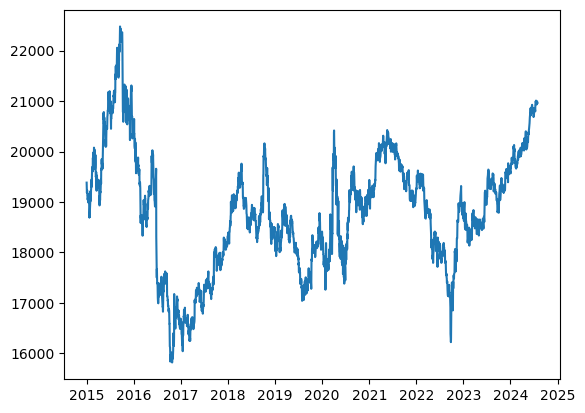

In [20]:
plt.plot(all_data.index, all_data.rupiahs_in_a_pound)



In [21]:
all_data['year'] = all_data.index.year
all_data['month'] = all_data.index.month 
all_data['day'] = all_data.index.day 

In [22]:
all_data.head()

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2015-01-01,0.000052,19383.601473,2015,1,1
2015-01-02,0.000052,19208.605455,2015,1,2
2015-01-03,0.000052,19182.812200,2015,1,3
2015-01-05,0.000052,19230.769231,2015,1,5
2015-01-06,0.000052,19168.104274,2015,1,6


# Model

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
X = all_data[['year', 'month', 'day']]
y = all_data.rupiahs_in_a_pound.values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2) 


In [25]:
X_train

,year,month,day
date,,,
2020-08-04,2020,8,4
2020-12-11,2020,12,11
2022-12-30,2022,12,30
2019-11-03,2019,11,3
2015-08-03,2015,8,3
...,...,...,...
2021-01-13,2021,1,13
2018-01-28,2018,1,28
2018-02-06,2018,2,6


# LSTM

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.metrics import MeanSquaredError


In [27]:
model = Sequential() 


# features and then samples
model.add(LSTM(100, input_shape=(3, 1))) 
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(64))
model.add(Dense(1))
optimizer = tf.keras.optimizers.Adam(0.01)

model.compile(loss='mse', optimizer=optimizer, metrics=['R2Score'])



model.fit(X_train, Y_train, epochs=100)
pred = model.predict(X_test) 
r2_score(Y_test, pred)

2024-07-30 13:39:57.614363: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-07-30 13:39:57.614386: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-30 13:39:57.614392: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-30 13:39:57.614615: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-30 13:39:57.614632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/miniconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

Epoch 1/100


2024-07-30 13:39:59.251428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - R2Score: -316.2356 - loss: 432712768.0000
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - R2Score: -178.7084 - loss: 256822704.0000
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - R2Score: -5.8281 - loss: 8721015.0000
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - R2Score: -0.1140 - loss: 1551446.7500
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - R2Score: -0.0964 - loss: 1518914.7500
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - R2Score: -0.3640 - loss: 1781955.0000
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - R2Score: -0.5182 - loss: 2146959.2500
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - R2Score: -0.1514 - loss: 1577213.2500
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - R2Score: -0.4324 - loss: 1968875.7500
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - R2Score: -0.3406 - loss: 1818515.3750
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - R2Score: -0.3982 - loss: 187

KeyboardInterrupt: 

In [ ]:
# plotting the accuracy 
sns.set()
# I have to use the same rows 

plt.scatter(all_data.date[X_test.index], all_data.rupiahs_in_a_pound[X_test.index])
plt.scatter(all_data.date[X_test.index], pred)
plt.legend(['actual', 'prediction'])
plt.ylabel("Rupiahs in a pound") 
plt.xlabel("Date") 
plt.show()


AttributeError: 'DataFrame' object has no attribute 'date'

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

In [ ]:
clf = DecisionTreeRegressor() 
clf.fit(X_train, Y_train) 
y_pred = clf.predict(X_test) 

print (r2_score(Y_test, y_pred))

0.983481422271982


In [ ]:
y_pred

array([18747.65654293, 17412.50217656, 21057.06464519, 19301.29318664,
       18559.76243504, 18821.75795219, 17331.02253033, 19319.9381762 ,
       21294.71890971, 17714.7918512 , 19149.75105324, 18244.84583105,
       19398.64209505, 18158.70710005, 21244.95432335, 19098.54851031,
       20424.83660131, 18570.10213556, 17768.30135039, 19364.83346243,
       19669.55153423, 18165.30426885, 18590.81613683, 20907.38030525,
       17630.46544429, 19278.96664739, 19353.59009096, 18208.30298616,
       19146.08462569, 17247.32666437, 17202.82126269, 18251.50574922,
       19516.00312256, 17152.65866209, 18491.12426036, 18910.74130106,
       17265.19337017, 17056.11461709, 17761.98934281, 17455.05323791,
       18594.27296393, 20391.51712887, 18953.75284306, 17930.78716156,
       16589.25016589, 18793.45987596, 21468.44139116, 20100.50251256,
       17853.95465096, 19440.1244168 , 20907.38030525, 17003.91089951,
       17111.56741958, 21468.44139116, 18057.06031058, 18800.52641474,
      

In [ ]:
all_data.head()

,pounds_in_a_rupiah,rupiahs_in_a_pound,year,month,day
date,,,,,
2015-01-01,0.000052,19383.601473,2015,1,1
2015-01-02,0.000052,19208.605455,2015,1,2
2015-01-03,0.000052,19182.812200,2015,1,3
2015-01-05,0.000052,19230.769231,2015,1,5
2015-01-06,0.000052,19168.104274,2015,1,6


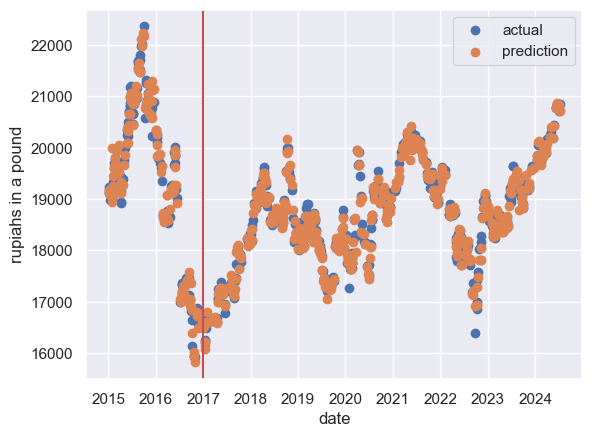

In [ ]:
# plotting the accuracy 
sns.set()
# I have to use the same rows 
plt.scatter(X_test.index, Y_test)

plt.scatter(X_test.index, y_pred)

plt.legend(['actual', 'prediction'])


plt.xlabel("date") 
plt.ylabel("rupiahs in a pound")


plt.axvline(x=pd.to_datetime('2017-01-01'), color="r")
plt.show()

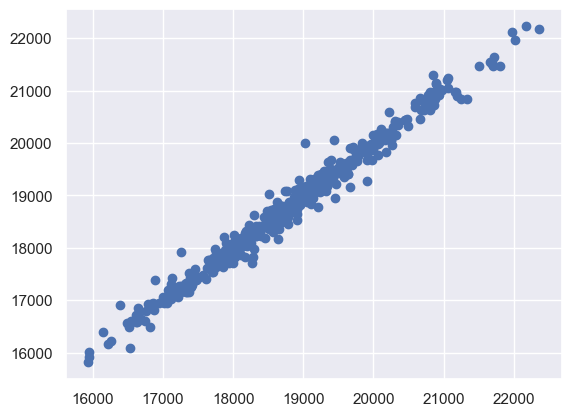

In [ ]:
plt.scatter(Y_test, y_pred)


# Attempting scalecast

In [28]:
from scalecast.Forecaster import Forecaster
f = Forecaster(
   y=all_data['rupiahs_in_a_pound'],
   current_dates=all_data.index,
   # defaults below
   require_future_dates=True,
   future_dates=None,
   test_length = 0,
   cis = False,
   metrics = ['rmse','mape','mae','r2'],
)

/opt/miniconda3/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [29]:
f

Forecaster(
    DateStartActuals=2015-01-01T00:00:00.000000000
    DateEndActuals=2024-07-29T00:00:00.000000000
    Freq=None
    N_actuals=2888
    ForecastLength=0
    Xvars=[]
    TestLength=0
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

<Axes: xlabel='Date', ylabel='Values'>

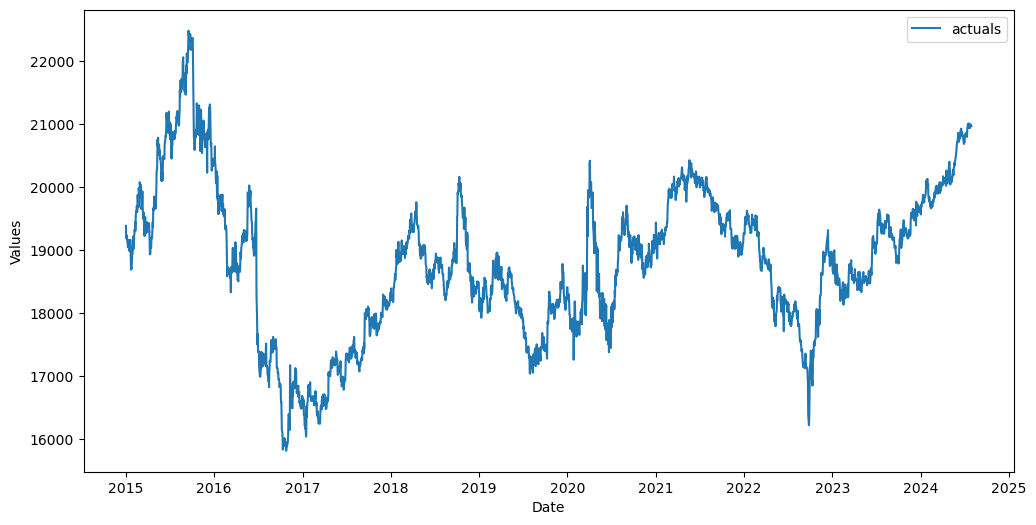

In [30]:
# test 

f.plot() 

## ACF plot 
Autocorrelation function plot 


## PACF plot 
Partial-autocorrelation Function (PACF) Plot, and Seasonal Decomposition Plot

## Findings 

> These show that there is a high amount of correlation between present and past values, otherwise known as autocorrelation, up to 25 periods. The first plot is a simple examination of this correlation; the second plot controls for correlation between terms.

> When such a pattern emerges, it is a strong indicator that the series is not stationary (its mean does not remain constant), which makes it difficult to forecast because it partly follows a “random walk” pattern, moving up and down seemingly at random. One way around this is to transform the data so that each value is the difference of the previous and current value in the series. Let’s view the ACF and PACF plots, this time using diffy=True to pass differenced data to the functions.

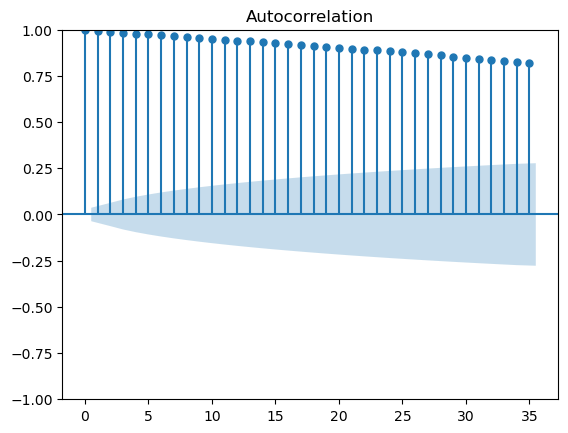

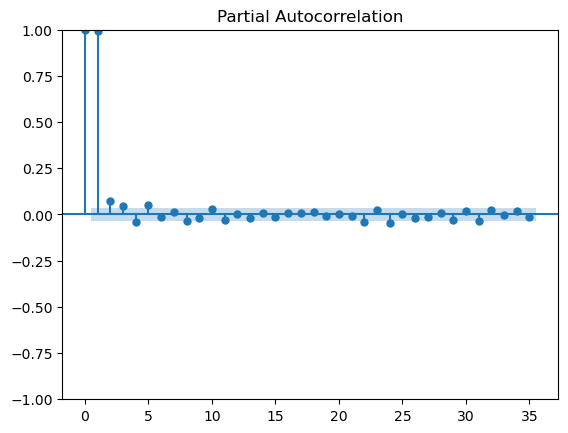

In [31]:
f.plot_acf()
f.plot_pacf()
plt.show()

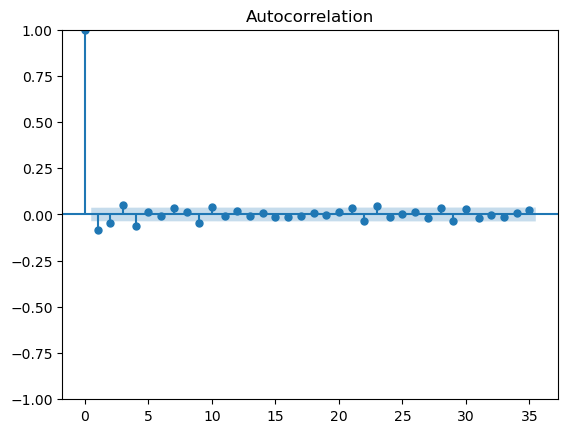

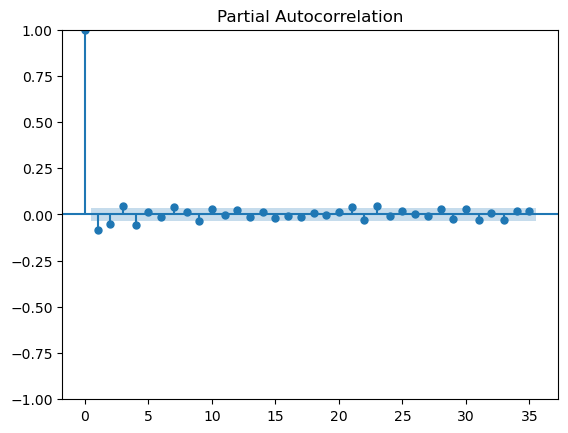

In [32]:
f.plot_acf(diffy=True)
f.plot_pacf(diffy=True)
plt.show()

It is important to hold out a chunk of the dataset to test the accuracy of the final forecasts. Let’s use 12 months to do so. We also want to forecast 24 months into the future.

In [33]:
f.set_test_length(12)




f.generate_future_dates(365)

Let’s decide what regressors to add to the Forecaster object. From the ACF plot, we can see there is significant correlation between present and future values back for several periods; let’s use 4 past values (otherwise known as lags or autoregressive terms) for now. We can also capture some seasonality with the 12th and 24th lags.



In [34]:
f.add_ar_terms(4) # 4 AR terms
f.add_AR_terms((2,12)) # 2 seasonal AR terms

The diff() method will difference all autoregressive terms (which it recognizes as the variables that begin with the “AR” label) in addition to the main series. That being said, let’s now add regressors that capture the effects of month and year.

In [35]:
f.add_seasonal_regressors('month',raw=False,sincos=True)
f.add_seasonal_regressors('year')

In [36]:
f.add_covid19_regressor() # called 'COVID19' by default
f.add_time_trend() # called 't' by default
f.add_combo_regressors('t','COVID19') # 't_COVID19'
f.add_poly_terms('t',pwr=3) # 't^2' and 't^3'

In [37]:
import prophet

In [38]:

f.set_validation_length(6)
# automatically tune and forecast with a series of models
models = ('mlr','knn','svr','xgboost','gbt','elasticnet','mlp','prophet')
for m in models:
 f.set_estimator(m)
 f.tune() # by default, will pull grids from Grids.py
 f.auto_forecast()
 f.set_estimator('combo')
f.manual_forecast(how='simple',models='top_3',determine_best_by='ValidationMetricValue',call_me='avg')
f.manual_forecast(how='weighted',models=models,determine_best_by='ValidationMetricValue',call_me='weighted')


13:42:26 - cmdstanpy - INFO - Chain [1] start processing
13:42:26 - cmdstanpy - INFO - Chain [1] done processing
13:42:27 - cmdstanpy - INFO - Chain [1] start processing
13:42:27 - cmdstanpy - INFO - Chain [1] done processing
13:42:27 - cmdstanpy - INFO - Chain [1] start processing
13:42:27 - cmdstanpy - INFO - Chain [1] done processing
13:42:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:42:27 - cmdstanpy - INFO - Chain [1] start processing
13:42:27 - cmdstanpy - INFO - Chain [1] done processing
13:42:27 - cmdstanpy - INFO - Chain [1] start processing
13:42:28 - cmdstanpy - INFO - Chain [1] done processing
13:42:28 - cmdstanpy - INFO - Chain [1] start processing
13:42:28 - cmdstanpy - INFO - Chain [1] done processing
13:42:28 - cmdstanpy - INFO - Chain [1] start processing
13:42:28 - cmdstanpy - INFO - Chain [1] done processing
13:42:28 - cmdstanpy - INFO - Chain [1] start processing
13:42:28 - cmdstanpy - INFO - Chain [1] done processing


We run the following code to specify a 6-period validation set and tune 8 different models:

In [39]:
f.set_estimator('lstm')
f.manual_forecast(
    call_me='lstm_model',
    epochs=100,
    loss='mse',
    learning_rate=0.01,
    optimizer='Adam',
    lstm_layer_sizes=[32],
)



Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0725
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 13/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019
Epoch 14/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoch 15/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018
Epoc

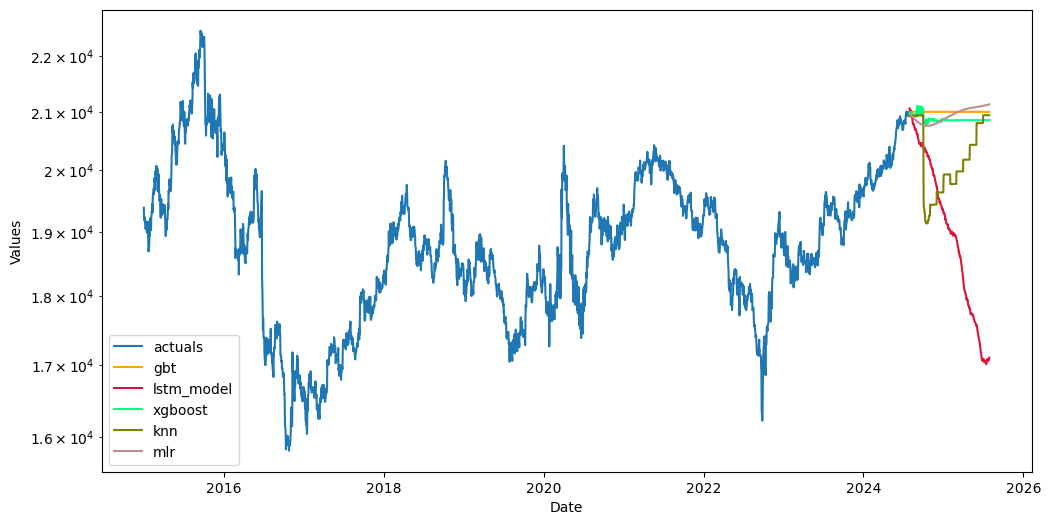

In [40]:
f.plot(models='top_5',order_by='TestSetRMSE')
plt.yscale("log") 
plt.show()

In [41]:
results = f.export(['model_summaries', 'lvl_test_set_predictions', 'lvl_fcsts']) # extract results
results

{'model_summaries':    ModelNickname   Estimator  \
 0            mlr         mlr   
 1            knn         knn   
 2            svr         svr   
 3        xgboost     xgboost   
 4            gbt         gbt   
 5     elasticnet  elasticnet   
 6            mlp         mlp   
 7        prophet     prophet   
 8            avg       combo   
 9       weighted       combo   
 10    lstm_model        lstm   
 
                                                 Xvars  \
 0   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 1   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 2   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 3   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 4   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 5   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 6   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 7                                                  []   
 8                                                None   
 9 

In [42]:
f.export(
    to_excel=True,
    excel_name='IDR_forecast.xlsx'
)


{'model_summaries':    ModelNickname   Estimator  \
 0            mlr         mlr   
 1            knn         knn   
 2            svr         svr   
 3        xgboost     xgboost   
 4            gbt         gbt   
 5     elasticnet  elasticnet   
 6            mlp         mlp   
 7        prophet     prophet   
 8            avg       combo   
 9       weighted       combo   
 10    lstm_model        lstm   
 
                                                 Xvars  \
 0   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 1   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 2   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 3   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 4   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 5   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 6   [AR1, AR2, AR3, AR4, AR12, AR24, monthsin, mon...   
 7                                                  []   
 8                                                None   
 9 

In [43]:
# Saving the forecaster object 


import joblib 


joblib.dump(f, "forecaster.joblib")

['forecaster.joblib']

In [44]:
import pickle
with open("forecaster.pkl", "wb") as file: 
    
    pickle.dump(f, file)


In [45]:
with open('forecaster.pkl', 'rb') as file: 
    z = pickle.load(file)

In [46]:
joblib.load('forecaster.pkl')

Forecaster(
    DateStartActuals=2015-01-01T00:00:00.000000000
    DateEndActuals=2024-07-29T00:00:00.000000000
    Freq=None
    N_actuals=2888
    ForecastLength=365
    Xvars=['AR1', 'AR2', 'AR3', 'AR4', 'AR12', 'AR24', 'monthsin', 'monthcos', 'year', 'COVID19', 't', 't_COVID19', 't^2', 't^3']
    TestLength=12
    ValidationMetric=rmse
    ForecastsEvaluated=['mlr', 'knn', 'svr', 'xgboost', 'gbt', 'elasticnet', 'mlp', 'prophet', 'avg', 'weighted', 'lstm_model']
    CILevel=None
    CurrentEstimator=lstm
    GridsFile=Grids
)

# Creating the Pipeline

In [47]:
## Creating an overall process 
# This class will 
# Remember to create the pipeline 
# This should detect all available years
from scalecast.Forecaster import Forecaster 
import pandas as pd 
import numpy as np 
import scipy.stats as stats 
from sklearn.model_selection import train_test_split 
from bs4 import BeautifulSoup
import requests
from sklearn.metrics import r2_score, accuracy_score


class collect_currency_exchange:
    
    
    def __init__(self, start_url):
        # I should not need to specify the years 
        self.start_url = start_url 

    def collect_data(self): 
        ######################################################
        # I need to collect the data for 2015 onwards
        
        
        data = requests.get(self.start_url) 
        
        soup = BeautifulSoup(data.text)


        # Collecting the available "years" 
        print ("Collecting the Years")
        years = soup.select("ul.rates-by-year")
        year = []
        for i in years: 
            element = (i.get_text(separator=" ", strip=True))
            print (element)
            year.append(element)
        element = ''.join(element)
        element = element.split(" ")
        element = [int(x) for x in element]
        # Collecting the tables 
        ## Finding the column names 
        print ("Collecting the tables")
        columns_html = soup.select("table.history-rates-data thead tr th.ltr-bidi-fix")
        values_html = soup.select("table.history-rates-data tbody")
        
        row_values_html = soup.select('table.history-rates-data tbody tr')
        
        columns = [i.text for i in columns_html]
        values = [i.text for i in values_html]
        row_values = [i.text for i in row_values_html]

        ######################################################
        # Function to parse each cell
        def parse_cell(cell):
            parts = cell.strip().split('\n')
            if len(parts) >= 5:  # Check if the cell contains the expected pattern
                human_readable_date = parts[1].strip()
                iso_date = parts[2].strip()
                exchange_rate = parts[4].strip()
                return human_readable_date, iso_date, exchange_rate
            else:
                return None
        
        # Apply the function to each cell and filter out invalid rows
        parsed_data = df_values['raw_data'].apply(parse_cell).dropna()
        
        # Create new DataFrame with the parsed data
        parsed_df = pd.DataFrame(parsed_data.tolist())
        
        # Display the resulting DataFrame
        print(parsed_df)
        ######################################################
        parsed_df.columns = ['date', 'a', 'pounds_in_a_rupiah']
        # I need to drop the text in the currency column 

        parsed_df.currency = parsed_df.pounds_in_a_rupiah.str.replace(".*£", "", regex=True)
        parsed_df['pounds_in_a_rupiah'] = pd.to_numeric(parsed_df['pounds_in_a_rupiah'])
        parsed_df['rupiah_in_a_pounds'] = 1 / parsed_df['pounds_in_a_rupiah']
        ######################################################

    


In [48]:
years.keys()

AttributeError: ResultSet object has no attribute 'keys'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [ ]:

array = [years[i] for i in years.keys()]
df2 = pd.concat([*array], axis=0)


In [ ]:
df2 = pd.concat([*array], axis=0)

In [ ]:
pd.concat([*array], axis=0)

,pounds_in_a_rupiah,rupiahs_in_a_pound
date,,
2015-01-01,0.000052,19383.601473
2015-01-02,0.000052,19208.605455
2015-01-03,0.000052,19182.812200
2015-01-05,0.000052,19230.769231
2015-01-06,0.000052,19168.104274
...,...,...
2023-12-25,0.000051,19657.951641
2023-12-26,0.000051,19615.535504
2023-12-27,0.000051,19688.915141


In [ ]:
df2.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10', '2015-01-12',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='date', length=2737, freq=None)

In [ ]:
years.keys()

dict_keys(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])